In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

In [3]:
from psikit import Psikit

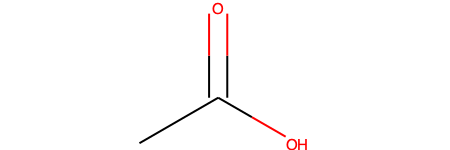

In [4]:
smi = 'CC(=O)O'
mol = Chem.MolFromSmiles(smi)
AllChem.Compute2DCoords(mol)
mol

In [5]:
# load smiles and perform optimzation
pk = Psikit()
pk.read_from_smiles(smi)
%time pk.optimize()

Optimizer: Optimization complete!
CPU times: user 21.9 s, sys: 996 ms, total: 22.9 s
Wall time: 6.31 s


-227.82082530457998

In [6]:
print('{} HOMO'.format(pk.HOMO))
print('{} LUMO'.format(pk.LUMO))

-0.447525061770846 HOMO
0.19145171932070656 LUMO


In [7]:
# Get Atoms from pk.mol object and check atom properties
atoms = pk.mol.GetAtoms()
print(list(atoms[0].GetPropNames()))

[]


In [8]:
charges = pk.resp_charge

In [9]:
atoms = pk.mol.GetAtoms()
print(list(atoms[0].GetPropNames()))

['EP_C', 'RESP_C']


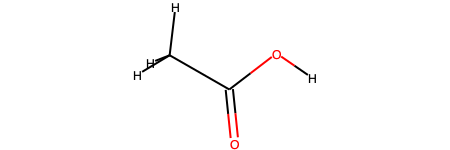

In [10]:
pk.mol

In [11]:
from rdkit.Chem.Draw import MolDrawOptions
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [12]:
view = rdMolDraw2D.MolDraw2DSVG(600,800)
op = view.drawOptions()
for idx, atom in enumerate(pk.mol.GetAtoms()):
    num = float(atom.GetProp('RESP_C'))
    op.atomLabels[idx] = "{}({:,.2f})".format(atom.GetSymbol(), num)
AllChem.Compute2DCoords(pk.mol)
view.DrawMolecule(pk.mol)
view.FinishDrawing()

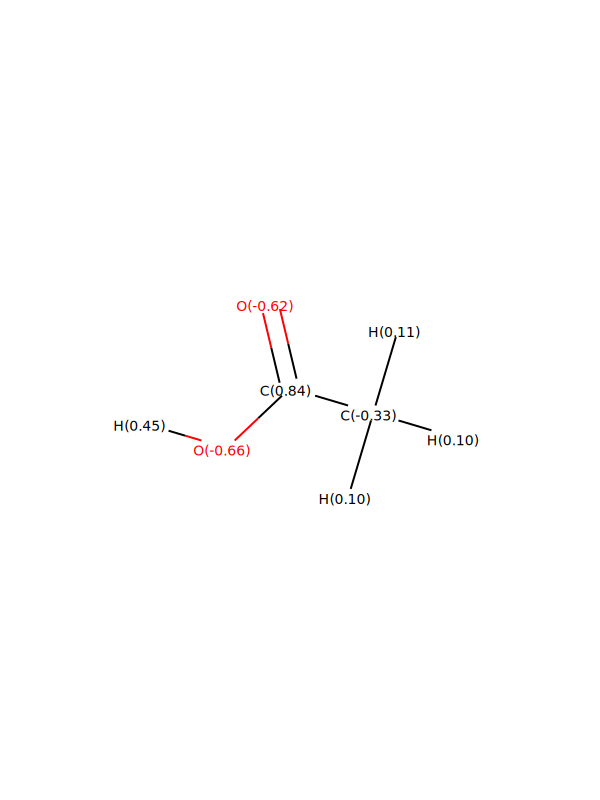

In [13]:
svg = view.GetDrawingText().replace('svg:', '')
SVG(svg)

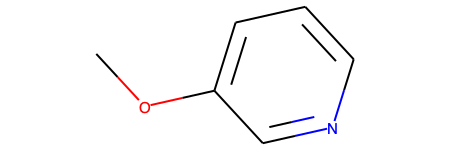

In [4]:
smi = 'COc1cccnc1'
mol = Chem.MolFromSmiles(smi)
AllChem.Compute2DCoords(mol)
mol

In [5]:
pk = Psikit()
pk.read_from_smiles(smi)
%time pk.optimize()

Optimizer: Optimization complete!
CPU times: user 1min 54s, sys: 3.97 s, total: 1min 58s
Wall time: 31.5 s


-360.58490537900167

In [6]:
# get MO view!
pk.getMOview()

Done!
